# INDIAN LIVER PATIENT
## About the dataset
This data set contains 416 liver patient records and 167 non liver patient records.The data set was collected from test samples in North East of Andhra Pradesh, India. 'is_patient' is a class label used to divide into groups(liver patient or not). This data set contains 441 male patient records and 142 female patient records.

## Attribute information
1.	age Age of the patient
2.	gender Gender of the patient
3.	tot_bilirubin Total Bilirubin
4.	direct_bilirubin Direct Bilirubin
5.	alkphos Alkaline Phosphotase
6.	sgpt Alamine Aminotransferase
7.	sgot Aspartate Aminotransferase
8.	tot_proteins Total Protiens
9.	albumin Albumin
10.	ag_ratio Albumin and Globulin Ratio
11.	is_patient Selector field used to split the data into two sets (labeled by the experts)


## Import required libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Review the data

In [2]:
df = pd.read_csv(r'Indian Liver Patient Dataset (ILPD).csv')

In [3]:
df.head(5)

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
df.describe()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
#check the value counts of liver patient or not
df['is_patient'].value_counts()

1    416
2    167
Name: is_patient, dtype: int64

## Treat categorical feature

In [7]:
df['gender']=df['gender'].map({'Female':1,'Male':0})

In [8]:
df.head(5)

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [9]:
#convery object into integer
df['gender'] = df['gender'].astype(int)

## Treating null values

In [10]:
#check the null values
df.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

In [11]:
#treat null values
df.dropna(axis=1,inplace = True)

In [12]:
#check the columns name
df.columns

Index(['age', 'gender', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins',
       'albumin', 'ag_ratio', 'sgpt', 'sgot', 'is_patient'],
      dtype='object')

## Visualization

gender  is_patient
0       1             324
        2             117
1       1              92
        2              50
Name: gender, dtype: int64

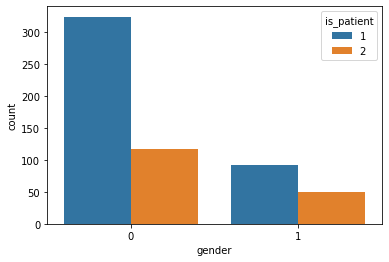

In [13]:
#checking non liver and liver patient compared with gender
sns.countplot(x=df['gender'], hue=df['is_patient'])
df.groupby(by=['gender','is_patient'])['gender'].count()

C:\Users\Shruti\OneDrive\Documents\IPython Notebooks\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shruti\OneDrive\Documents\IPython Notebooks\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_patient'>

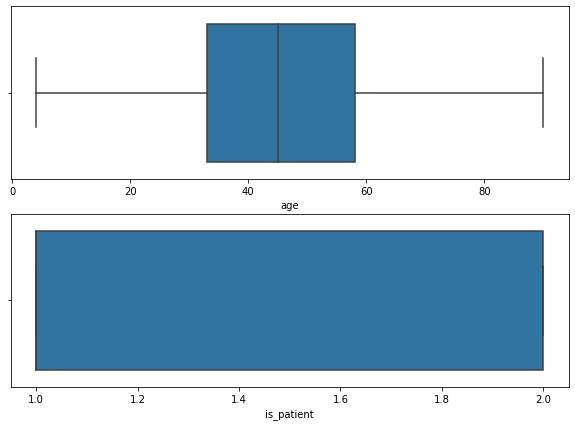

In [14]:
#prepare boxplot
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
sns.boxplot(df['age'])
plt.subplot(2,1,2)
sns.boxplot(df['is_patient'])

C:\Users\Shruti\OneDrive\Documents\IPython Notebooks\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tot_proteins'>

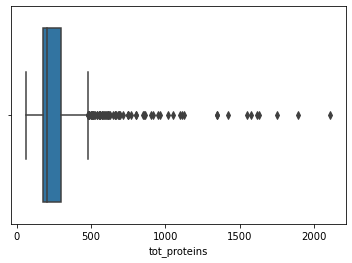

In [15]:
#prepare boxplot
sns.boxplot(df['tot_proteins'])

In [16]:
#prepare confusion matrix
df.corr()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,is_patient
age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.137351
gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.082416
tot_bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.220208
direct_bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.246046
tot_proteins,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.184866
albumin,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.163416
ag_ratio,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.151934
sgpt,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.035008
sgot,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.161388
is_patient,-0.137351,0.082416,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,1.000000


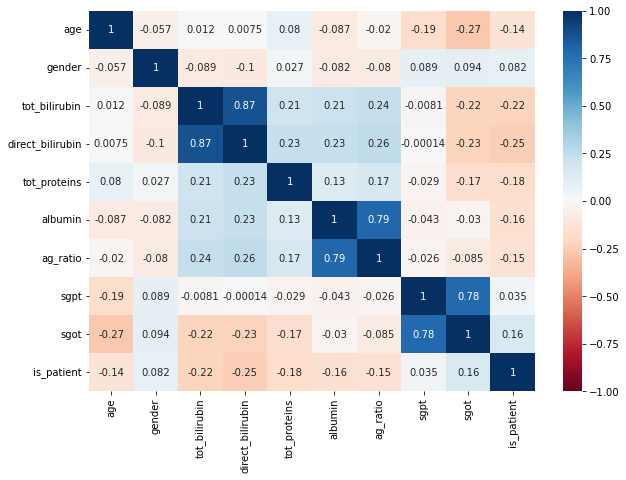

In [17]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), vmax=1, vmin=-1, annot=True, cmap='RdBu')
plt.show()

## Model evaluation

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x = df.drop(columns=['is_patient'])
y = df['is_patient']

In [20]:
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state = 42)

In [21]:
print('The shape of Training Data ', x_train.shape, 'and', y_train.shape)
print('The shape of Testing Data', x_test.shape , 'and', y_test.shape)

The shape of Training Data  (390, 9) and (390,)
The shape of Testing Data (193, 9) and (193,)


## Build model

### 1. Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train,y_train)

C:\Users\Shruti\OneDrive\Documents\IPython Notebooks\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
#Do predictions
pred1 = model1.predict(x_test)
pred1

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1], dtype=int64)

In [44]:
#Check accuracy score
from sklearn.metrics import accuracy_score
model1 = accuracy_score(y_test,pred1)
print('the accuracy of model:', model1*100,'%')

the accuracy of model: 72.02072538860104 %


In [46]:
#prepare classification report
from sklearn.metrics import classification_report
classification_report(y_test,pred1)
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           1       0.75      0.92      0.83       141
           2       0.45      0.17      0.25        52

    accuracy                           0.72       193
   macro avg       0.60      0.55      0.54       193
weighted avg       0.67      0.72      0.67       193



In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred1)
cm
cm = pd.DataFrame(cm, columns = ['Actual Value : 1', 'Actual Value : 0'], index = ['Predicted Values : 1', 'Predicted Values : 0'])

In [50]:
cm

,Actual Value : 1,Actual Value : 0
Predicted Values : 1,130,11
Predicted Values : 0,43,9


<AxesSubplot:>

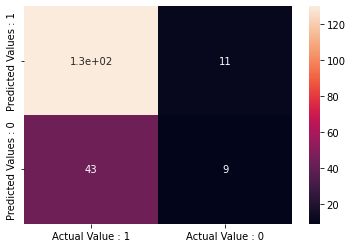

In [52]:
sns.heatmap(cm , annot= True)

### 2.Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [54]:
model2 = tree.DecisionTreeClassifier()

In [55]:
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [56]:
pred2 = model2.predict(x_test)

In [57]:
model2 = accuracy_score(y_test,pred2)
print('the accuracy of model:', model2*100,'%')

the accuracy of model: 70.46632124352331 %


In [59]:
classification_report(y_test,pred2)
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           1       0.79      0.82      0.80       141
           2       0.45      0.40      0.42        52

    accuracy                           0.70       193
   macro avg       0.62      0.61      0.61       193
weighted avg       0.70      0.70      0.70       193



In [61]:
cm1 = confusion_matrix(y_test, pred2)
cm1

array([[115,  26],
       [ 31,  21]], dtype=int64)

<AxesSubplot:>

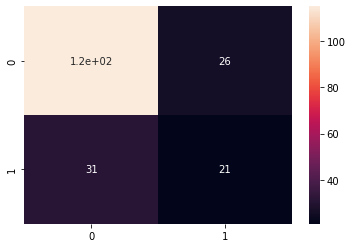

In [62]:
sns.heatmap(cm1 , annot= True)

### 3. K neariest neighbors

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
model3 = KNeighborsClassifier(n_neighbors= 7)

In [65]:
model3.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [66]:
pred3 = model3.predict(x_test)

In [67]:
model3 = accuracy_score(y_test,pred3)
print('the accuracy of model:', model3*100,'%')

the accuracy of model: 73.57512953367875 %


In [68]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           1       0.79      0.87      0.83       141
           2       0.51      0.38      0.44        52

    accuracy                           0.74       193
   macro avg       0.65      0.62      0.63       193
weighted avg       0.72      0.74      0.72       193



In [69]:
pred4 = model4.predict(x_test)

In [70]:
cm = confusion_matrix(y_test, pred3)
cm

array([[122,  19],
       [ 32,  20]], dtype=int64)

In [71]:
cm = pd.DataFrame(cm, columns = ['Actual Value : 1', 'Actual Value : 0'], index = ['Predicted Values : 1', 'Predicted Values : 0'])

In [72]:
cm

,Actual Value : 1,Actual Value : 0
Predicted Values : 1,122,19
Predicted Values : 0,32,20


<AxesSubplot:>

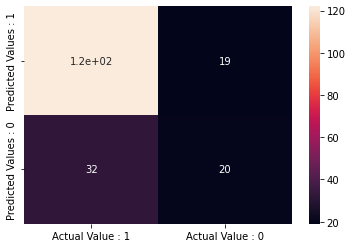

In [73]:
sns.heatmap(cm , annot= True)

In [74]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import math

In [75]:
mse = mean_squared_error(y_test,pred3)
mae = mean_absolute_error(y_test,pred3)
rmse = math.sqrt(mse)
print('MSR=',mse,'MAE=',mae,'RMSE=',rmse)

MSR= 0.26424870466321243 MAE= 0.26424870466321243 RMSE= 0.5140512665709641
